# Introduction to Keras and TensorFlow

## 3.1 all ones or all zeros tensors

In [3]:
# 匯入Tensorflow套件
import tensorflow as tf

In [4]:
# all ones Tensor
x = tf.ones(shape=(2,1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [5]:
# all zeros Tensor
x = tf.zeros(shape=(2,1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


## 3.2 Random tensors

In [6]:
#create a random normal distribution
#mean: the mean of normal distribution
#stddev:The standard deviation of the normal distribution.
x = tf.random.normal(shape=(3,1), mean=0., stddev=1.)
# help(tf.random.normal)
print(x)

tf.Tensor(
[[-1.0521284]
 [ 0.0946827]
 [-0.3372142]], shape=(3, 1), dtype=float32)


In [7]:
#create a random uniform list
#uniform均勻
#minval:the min range of random uniform distribution
#maxval:the max range of random uniform distribution
x = tf.random.uniform(shape=(10,1), minval=0., maxval=1.)
# help(tf.random.uniform)
print(x)

tf.Tensor(
[[0.70439136]
 [0.48481607]
 [0.32361794]
 [0.64304805]
 [0.89710426]
 [0.4782064 ]
 [0.7873416 ]
 [0.04673707]
 [0.03517616]
 [0.9074671 ]], shape=(10, 1), dtype=float32)


## 3.3 NumPy arrays are assignable

In [8]:
# You can specify a number to numpy array
import numpy as np
x = np.ones(shape=(2,2))
x[0,0]=0

## 3.4 TensorFlow tensors are not assignable

In [9]:
# But you can't on Tensors.
x = tf.ones(shape=(2,2))
x[0,0]=0

TypeError: ignored

## 3.5 Creating a TensorFlow variable

In [10]:
# You can assign by Tensorflow variable.

In [11]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 0.5680217 ],
       [-0.12458444],
       [ 0.8039118 ]], dtype=float32)>


## 3.6 Assigning a value to a TensorFlow variable

In [12]:
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

## 3.7 Assigning a value to a subset of a TensorFlowvariable

In [13]:
v[0,0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

## 3.8 Using assign_add()

In [14]:
# assign_add +=
v.assign_add(tf.ones((3,1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

In [15]:
#assign_sub -=
v.assign_sub(tf.ones((3,1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

## 3.9 A few basic math operations

In [16]:
a = tf.ones((2, 2)) # [[1,1][1,1]]
b = tf.square(a) #[[1,1][1,1]]
c = tf.sqrt(a) #[[1,1][1,1]]
d = b + c # [2,2][2,2]
e = tf.matmul(a, b) #矩陣乘法 [[2,2][2,2]]
e *= d #[[4,4][4,4]]

## 3.10 Using the GradientTape

In [17]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
    result = tf.square(input_var)
gradient = tape.gradient(result, input_var) # gradient = tape.gradient(loss , weight)

## 3.11 Using GradientTape with constant tensorinputs

In [18]:
input_const = tf.constant(3.) # To avoid waste much space on some constantly variable
with tf.GradientTape() as tape:
    tape.watch(input_const)
    result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

## 3.12 Using nested gradient tapes to computesecond-order gradients

In [19]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position=4.9*time**2
    speed = inner_tape.gradient(position,time)
acceleration = outer_tape.gradient(speed,time)
print(position)
print(speed)
print(acceleration)

tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(9.8, shape=(), dtype=float32)


## 3.13 Generating two classes of random points in a 2D plane

In [20]:
import numpy as np
num_samples_per_class=1000
negative_samples=np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples=np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

### Stacking the two classes into an array with shape (2000, 2)

In [21]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
inputs

array([[-0.8831018 ,  2.3120646 ],
       [ 2.0280714 ,  4.946315  ],
       [-0.16921633,  1.98035   ],
       ...,
       [ 3.1921997 , -0.537912  ],
       [ 2.760876  ,  1.5390552 ],
       [ 2.6653814 ,  0.8881891 ]], dtype=float32)

## 3.15 Generating the corresponding targets (0 and 1)

In [22]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))
targets

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

## 3.16 Plotting the two point classes

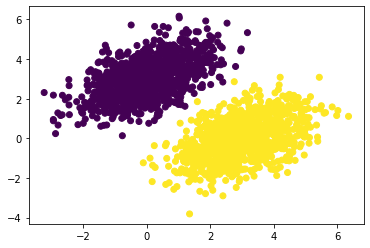

In [23]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

## 3.17 Creating the linear classifi er variables

In [24]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

## 3.18 The forward pass function 向前傳遞函數

In [25]:
def model(inputs):
    return tf.matmul(inputs, W) + b

## 3.19 The mean squared error loss function

In [26]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

## 3.20 The training step function

In [27]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

## 3.21 The batch training loop

In [28]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 4.8078
Loss at step 1: 0.3304
Loss at step 2: 0.1475
Loss at step 3: 0.1157
Loss at step 4: 0.1048
Loss at step 5: 0.0974
Loss at step 6: 0.0909
Loss at step 7: 0.0851
Loss at step 8: 0.0798
Loss at step 9: 0.0750
Loss at step 10: 0.0706
Loss at step 11: 0.0666
Loss at step 12: 0.0630
Loss at step 13: 0.0596
Loss at step 14: 0.0566
Loss at step 15: 0.0538
Loss at step 16: 0.0513
Loss at step 17: 0.0490
Loss at step 18: 0.0469
Loss at step 19: 0.0450
Loss at step 20: 0.0433
Loss at step 21: 0.0417
Loss at step 22: 0.0403
Loss at step 23: 0.0390
Loss at step 24: 0.0378
Loss at step 25: 0.0367
Loss at step 26: 0.0357
Loss at step 27: 0.0348
Loss at step 28: 0.0340
Loss at step 29: 0.0332
Loss at step 30: 0.0325
Loss at step 31: 0.0319
Loss at step 32: 0.0313
Loss at step 33: 0.0308
Loss at step 34: 0.0304
Loss at step 35: 0.0299
Loss at step 36: 0.0295
Loss at step 37: 0.0292
Loss at step 38: 0.0289
Loss at step 39: 0.0286


### Prediction Result

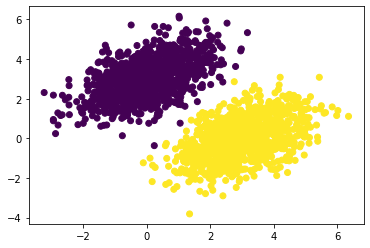

In [29]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

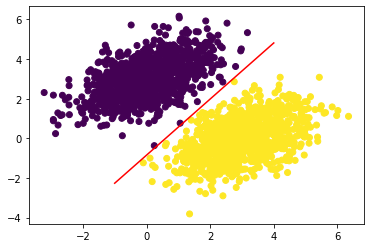

In [30]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

## 3.22 A Dense layer implemented as a Layer subclass

建立 class 快速建立模型
有別於之前的NaiveDense不必告訴它上一層輸入的size，它會利用build()方法接收到的第一個輸入形狀作為參數。

In [31]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [32]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


建立模型架構

In [35]:
from tensorflow.keras import layers
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])
#還需要決定優化器、損失函數、指標
#優化器Optimizers:
# SGD(with or without momentum)
# RMSprop
# Adam
# Adagrad
#損失函數
# Losses:
# CategoricalCrossentropy
# SparseCategoricalCrossentropy
# BinaryCrossentropy
# MeanSquaredError
# KLDivergence
# CosineSimilarity
#指標Metrics:
# CategoricalAccuracy
# SparseCategoricalAccuracy
# BinaryAccuracy
# AUC
# Precision
# Recall

In [36]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop",
      loss="mean_squared_error",
      metrics=["accuracy"])

Calling fit() with NumPy data

In [37]:
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)

Epoch 1/5
16/16 [==============================] - 0s 2ms/step - loss: 4.0348 - accuracy: 0.5180
Epoch 2/5
16/16 [==============================] - 0s 2ms/step - loss: 3.7160 - accuracy: 0.5190
Epoch 3/5
16/16 [==============================] - 0s 1ms/step - loss: 3.4527 - accuracy: 0.5200
Epoch 4/5
16/16 [==============================] - 0s 2ms/step - loss: 3.2062 - accuracy: 0.5205
Epoch 5/5
16/16 [==============================] - 0s 2ms/step - loss: 2.9677 - accuracy: 0.5210


訓練紀錄

In [38]:
history.history

{'loss': [4.034811019897461,
  3.715977191925049,
  3.452746629714966,
  3.206162929534912,
  2.9676883220672607],
 'accuracy': [0.5180000066757202,
  0.5189999938011169,
  0.5199999809265137,
  0.5205000042915344,
  0.5210000276565552]}

Using the validation_data argument

In [39]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

Epoch 1/5
88/88 [==============================] - 1s 5ms/step - loss: 0.3626 - binary_accuracy: 0.9514 - val_loss: 0.0590 - val_binary_accuracy: 0.9917
Epoch 2/5
88/88 [==============================] - 0s 4ms/step - loss: 0.0754 - binary_accuracy: 0.9529 - val_loss: 0.0839 - val_binary_accuracy: 0.9750
Epoch 3/5
88/88 [==============================] - 0s 4ms/step - loss: 0.0748 - binary_accuracy: 0.9593 - val_loss: 0.0263 - val_binary_accuracy: 1.0000
Epoch 4/5
88/88 [==============================] - 1s 6ms/step - loss: 0.0698 - binary_accuracy: 0.9600 - val_loss: 0.0271 - val_binary_accuracy: 1.0000
Epoch 5/5
88/88 [==============================] - 0s 5ms/step - loss: 0.0747 - binary_accuracy: 0.9514 - val_loss: 0.0445 - val_binary_accuracy: 0.9967


The predict after training

In [41]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

[[0.07110575]
 [0.15640005]
 [0.9076681 ]
 [0.93062794]
 [0.9068141 ]
 [1.0279984 ]
 [0.38128108]
 [0.7787991 ]
 [0.84713924]
 [0.01774287]]
